# Callback functions:
A callback is a powerful tool to customize the behavior of a Keras model during training, evaluation, or inference.TensorBoard to visualize training progress and results with TensorBoard, or tf.keras.callbacks. ModelCheckpoint to periodically save your model during training. This callback reduces the learning rate when a metric you've mentioned during training eg. accuracy or loss has stopped improving. Models often benefit from reducing the learning rate.There are many callback functions,

- Early Stopping callback
- Model checkpointing callback
- Tensorboard callback Functions


We will also see how to save a model & load as well.

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# GPU / CPU Check

In [2]:
tf.config.list_physical_devices("GPU")

[]

In [3]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Creating a simple classifier using keras on MNIST data

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
len(X_test[1][0])

28

In [6]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [7]:
len(X_train_full[5000:] )

55000

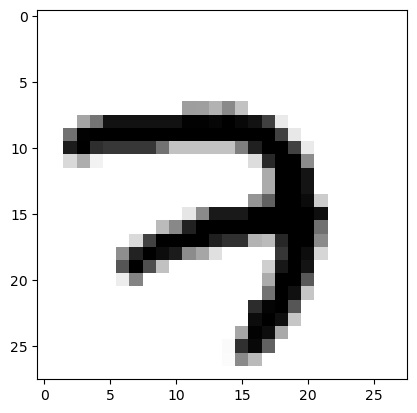

In [8]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<AxesSubplot:>

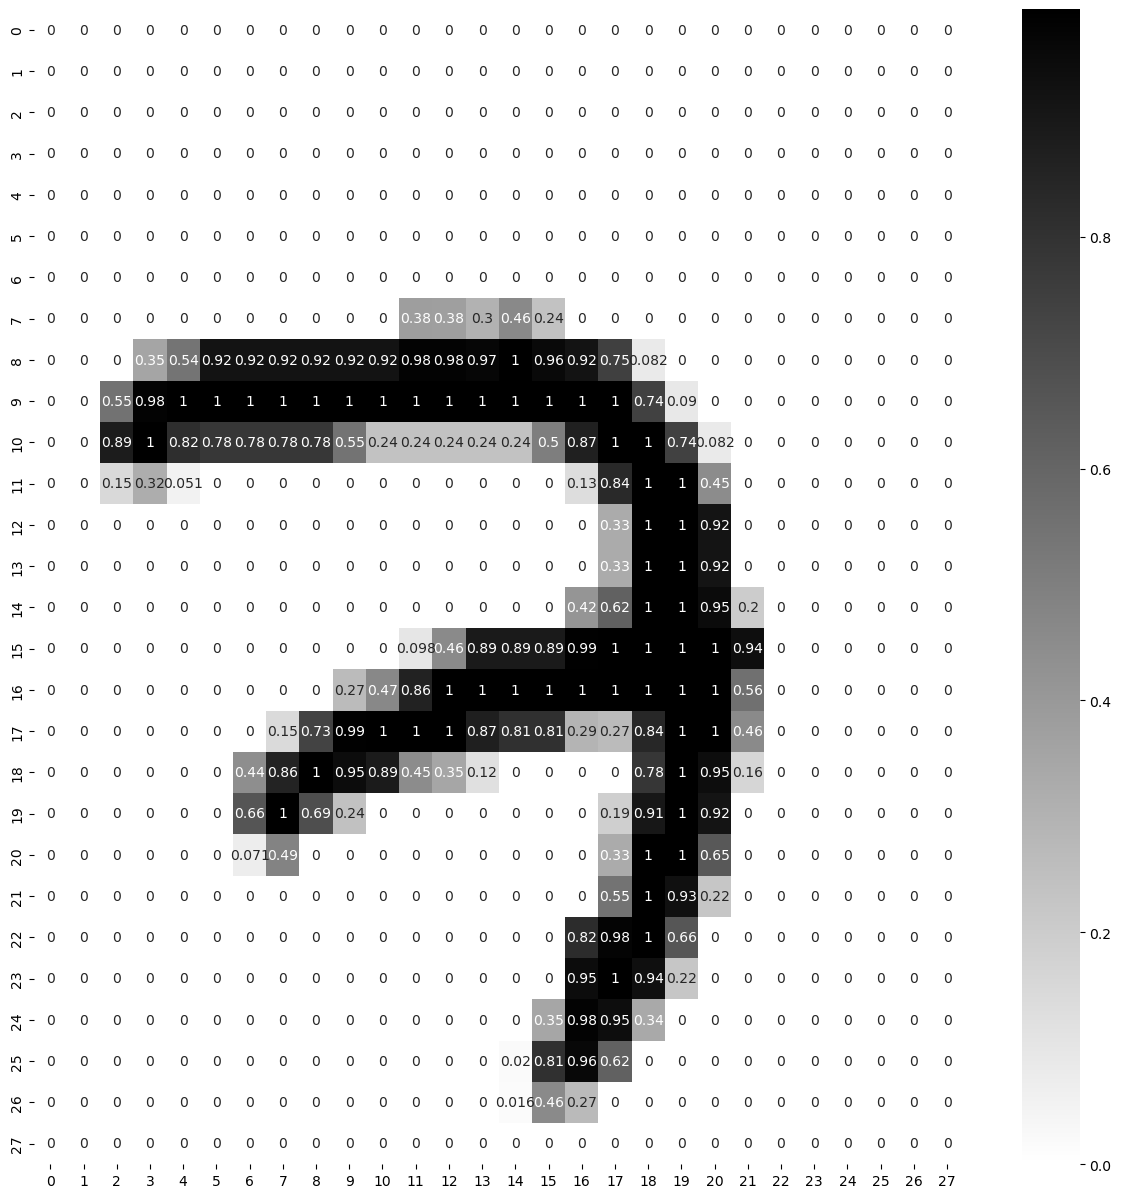

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [10]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [11]:
model_clf.layers

In [12]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [14]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [15]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [16]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [17]:
len(hidden1.get_weights()[1])

300

In [18]:
hidden1.get_weights()

[array([[ 0.06848344, -0.06236074,  0.04891974, ...,  0.04979738,
          0.01494728,  0.07387871],
        [-0.00886402,  0.00656497, -0.06227718, ...,  0.0318168 ,
         -0.0699442 ,  0.0278708 ],
        [-0.03365566,  0.02144036,  0.02585579, ..., -0.0417507 ,
         -0.06973674,  0.02569675],
        ...,
        [ 0.03276467,  0.03431604, -0.03819792, ...,  0.03174627,
          0.0689138 ,  0.0555401 ],
        [-0.02919883,  0.05030508,  0.00313761, ..., -0.05048722,
          0.01200102, -0.01024104],
        [ 0.01934398,  0.02912869, -0.06584201, ..., -0.07066315,
         -0.00669595, -0.05064959]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 0.06848344, -0.06236074,  0.04891974, ...,  0.04979738,
         0.01494728,  0.07387871],
       [-0.00886402,  0.00656497, -0.06227718, ...,  0.0318168 ,
        -0.0699442 ,  0.0278708 ],
       [-0.03365566,  0.02144036,  0.02585579, ..., -0.0417507 ,
        -0.06973674,  0.02569675],
       ...,
       [ 0.03276467,  0.03431604, -0.03819792, ...,  0.03174627,
         0.0689138 ,  0.0555401 ],
       [-0.02919883,  0.05030508,  0.00313761, ..., -0.05048722,
         0.01200102, -0.01024104],
       [ 0.01934398,  0.02912869, -0.06584201, ..., -0.07066315,
        -0.00669595, -0.05064959]], dtype=float32)

In [21]:
print("shape\n", biases.shape)

shape
 (300,)


In [22]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

# Tensorboard callback Functions

In [23]:
# Logging
import time 

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

In [24]:
log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit\log_2024_08_18_19_26_55


# Early Stopping callback

In [25]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Model checkpointing callback

In [26]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [27]:
# Orginal train

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5938 - accuracy: 0.8478 - val_loss: 0.3038 - val_accuracy: 0.9168
Epoch 2/30
  63/1719 [>.............................] - ETA: 4s - loss: 0.3278 - accuracy: 0.9043

C:\Users\Huzaifa Khan\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 5s 3ms/step - loss: 0.2896 - accuracy: 0.9174 - val_loss: 0.2454 - val_accuracy: 0.9308
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2386 - accuracy: 0.9315 - val_loss: 0.2093 - val_accuracy: 0.9418
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2043 - accuracy: 0.9419 - val_loss: 0.1854 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1786 - accuracy: 0.9491 - val_loss: 0.1630 - val_accuracy: 0.9528
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1583 - accuracy: 0.9547 - val_loss: 0.1467 - val_accuracy: 0.9576
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1418 - accuracy: 0.9599 - val_loss: 0.1362 - val_accuracy: 0.9616
Epoch 8/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1279 - accuracy: 0.9640 - val_loss: 0.1301 - val_accuracy: 0.9628
Epo

In [28]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0293 - accuracy: 0.9934 - val_loss: 0.0684 - val_accuracy: 0.9794
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9938 - val_loss: 0.0714 - val_accuracy: 0.9780
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0259 - accuracy: 0.9943 - val_loss: 0.0757 - val_accuracy: 0.9754
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0244 - accuracy: 0.9946 - val_loss: 0.0697 - val_accuracy: 0.9780
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0234 - accuracy: 0.9951 - val_loss: 0.0686 - val_accuracy: 0.9790
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0221 - accuracy: 0.9953 - val_loss: 0.0677 - val_accuracy: 0.9798
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0207 - accuracy: 0.9961 - val_loss: 0.0692 - val_accuracy:

# Saving the Model

In [29]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [30]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH 

Model Model_2024_08_18_19_32_48_.h5 will be saved at TRAINED_MODEL\Model_2024_08_18_19_32_48_.h5


'TRAINED_MODEL\\Model_2024_08_18_19_32_48_.h5'

In [31]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

C:\Users\Huzaifa Khan\AppData\Local\Temp\ipykernel_22244\455177707.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_clf, UNIQUE_PATH)


In [32]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [33]:
# history.history

In [34]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.029302,0.993364,0.068387,0.9794
1,0.027617,0.993800,0.071393,0.9780
2,0.025885,0.994345,0.075702,0.9754
3,0.024401,0.994618,0.069750,0.9780
4,0.023406,0.995073,0.068590,0.9790
5,0.022091,0.995345,0.067724,0.9798
6,0.020655,0.996127,0.069157,0.9786
7,0.019507,0.996091,0.068632,0.9790
8,0.018595,0.996545,0.067957,0.9792
9,0.017505,0.997000,0.066600,0.9796


<AxesSubplot:>

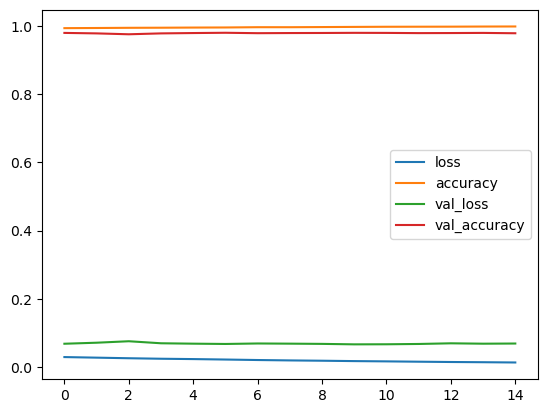

In [35]:
pd.DataFrame(history.history).plot()

In [36]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0693 - accuracy: 0.9789


[0.0692918449640274, 0.9789000153541565]

In [37]:
x_new = X_test[:3]
# x_new

In [38]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [39]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 69ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [40]:
y_prob

array([[1.3615631e-06, 1.1114178e-07, 6.2438114e-05, 2.9710526e-04,
        1.0122891e-08, 4.9248393e-07, 3.6589056e-12, 9.9962020e-01,
        5.8115766e-06, 1.2543421e-05],
       [6.8168742e-07, 2.0816570e-04, 9.9971062e-01, 5.8717513e-05,
        4.1993865e-12, 6.2303279e-06, 1.4437007e-06, 2.3516473e-12,
        1.4045699e-05, 3.5073140e-12],
       [1.3732628e-06, 9.9813485e-01, 2.7312807e-04, 2.9443418e-05,
        8.6759486e-05, 2.1175438e-04, 6.5525855e-05, 5.6259276e-04,
        6.0873054e-04, 2.5697052e-05]], dtype=float32)

In [41]:
y_pred = np.argmax(y_prob, axis = -1)

In [42]:
y_pred

array([7, 2, 1], dtype=int64)

In [43]:
actual

array([7, 2, 1], dtype=uint8)

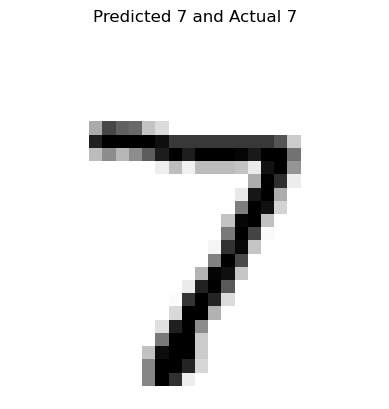

######################


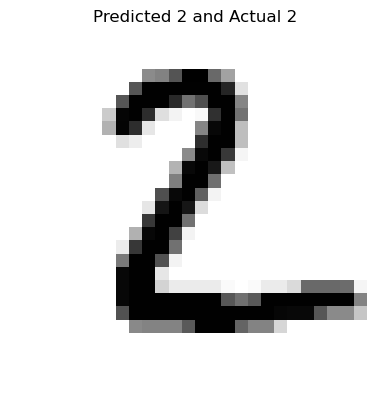

######################


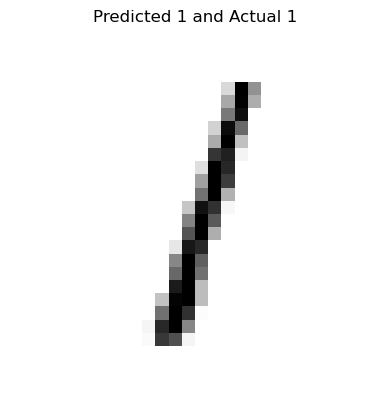

######################


In [44]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")